In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
data = pd.read_csv(r"C:\Users\reddy\OneDrive\Desktop\online_retail_customer_churn.csv")
data.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [7]:
import pandas as pd
print("Columns found in dataset:")
print(data.columns.tolist())
print("\nDtypes:")
print(data.dtypes)
data.columns = data.columns.str.strip()
cols_lower = {c.lower(): c for c in data.columns}  
description_col = None
if 'description' in cols_lower:
    description_col = cols_lower['description']
else:
    candidates = [orig for low, orig in cols_lower.items()
                  if ('desc' in low) or ('product' in low) or ('item' in low) or ('name' in low)]
    if candidates:
        preferred = None
        for cand in candidates:
            low = cand.lower()
            if 'product' in low or 'desc' in low:
                preferred = cand
                break
        description_col = preferred or candidates[0]
if description_col is None:
    print("\nNo obvious Description-like column found. Creating 'Description' by combining all text columns.")
    text_cols = data.select_dtypes(include=['object']).columns.tolist()
    if not text_cols:
        raise KeyError("No text columns found to construct a Description. Please inspect your dataset columns above.")
    data['Description'] = data[text_cols].fillna('').agg(' '.join, axis=1).str.strip()
else:
    if description_col != 'Description':
        data['Description'] = data[description_col]
invoice_col = None
if 'invoiceno' in cols_lower:
    invoice_col = cols_lower['invoiceno']
elif 'invoice' in cols_lower:
    invoice_col = cols_lower['invoice']
elif 'orderid' in cols_lower:
    invoice_col = cols_lower['orderid']

if invoice_col is None:
    num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
    if num_cols:
        invoice_col = num_cols[0]
        print(f"\nWarning: no clear InvoiceNo/Invoice column found. Using '{invoice_col}' as invoice identifier (best-effort).")
    else:
        raise KeyError("No Invoice/InvoiceNo/OrderId-like column found. Please supply a column to act as transaction ID.")
if invoice_col != 'InvoiceNo':
    data['InvoiceNo'] = data[invoice_col]
before = len(data)
data.dropna(subset=['InvoiceNo', 'Description'], inplace=True)
after_dropna = len(data)
print(f"\nDropped {before - after_dropna} rows missing InvoiceNo or Description.")
before_dup = len(data)
data.drop_duplicates(inplace=True)
after_dup = len(data)
print(f"Dropped {before_dup - after_dup} duplicate rows.")
data['Description'] = data['Description'].astype(str).str.strip().str.lower()
print("\nFinal dataset info:")
print(data[['InvoiceNo','Description']].head())
print("\nRemaining rows:", len(data))


Columns found in dataset:
['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response', 'Target_Churn']

Dtypes:
Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

No obvious Description-like column found. Creating 'Description' by combining all text columns.



In [30]:
basket_sets = basket_sets.astype(bool)
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Frequent itemsets found:", len(frequent_itemsets))
print("Rules generated:", len(rules))
display(rules.head())

Frequent itemsets found: 9
Rules generated: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [31]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)
print("Top Association Rules:")
rules.head(10)

Top Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


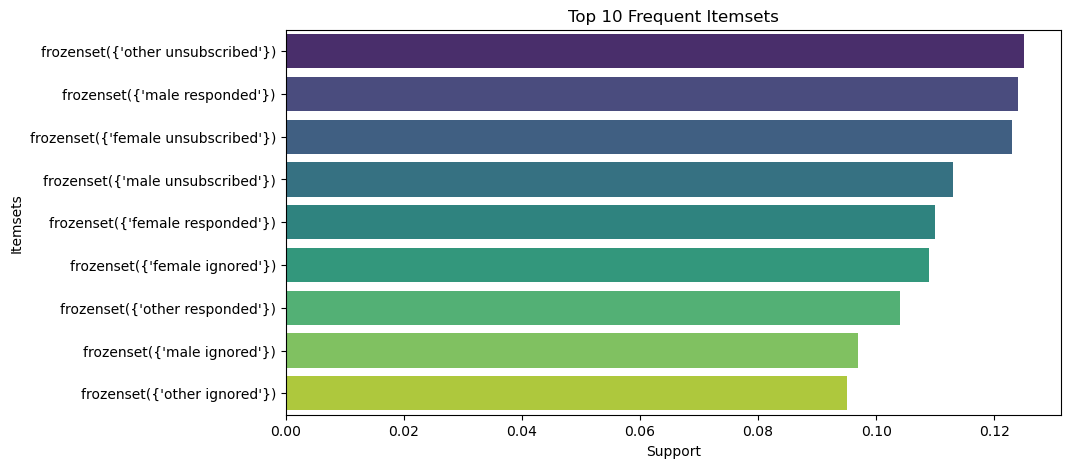

In [11]:
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='support', y='itemsets', data=top_items, palette='viridis')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

In [32]:
from mlxtend.frequent_patterns import apriori, association_rules
basket_sets = basket_sets.astype(bool)
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
print("Frequent itemsets found:", len(frequent_itemsets))
display(frequent_itemsets.head())
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print("Rules generated:", len(rules))
display(rules.head(10))

Frequent itemsets found: 9


,support,itemsets
0,0.109,(female ignored)
1,0.110,(female responded)
2,0.123,(female unsubscribed)
3,0.097,(male ignored)
4,0.124,(male responded)


Rules generated: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [33]:
invoice_items = data.groupby('InvoiceNo')['Description'].nunique()
print(invoice_items.describe())

count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Description, dtype: float64


In [34]:
basket_sets = basket_sets.astype(bool)
frequent_itemsets = apriori(basket_sets, min_support=0.0005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
print("Frequent itemsets found:", len(frequent_itemsets))
print("Rules generated:", len(rules))

Frequent itemsets found: 9
Rules generated: 0


In [35]:
if len(rules) > 0:
    plt.figure(figsize=(8,6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c='blue')
    plt.title('Support vs Confidence')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()
else:
    print(" No rules generated — cannot plot.")

⚠️ No rules generated — cannot plot.


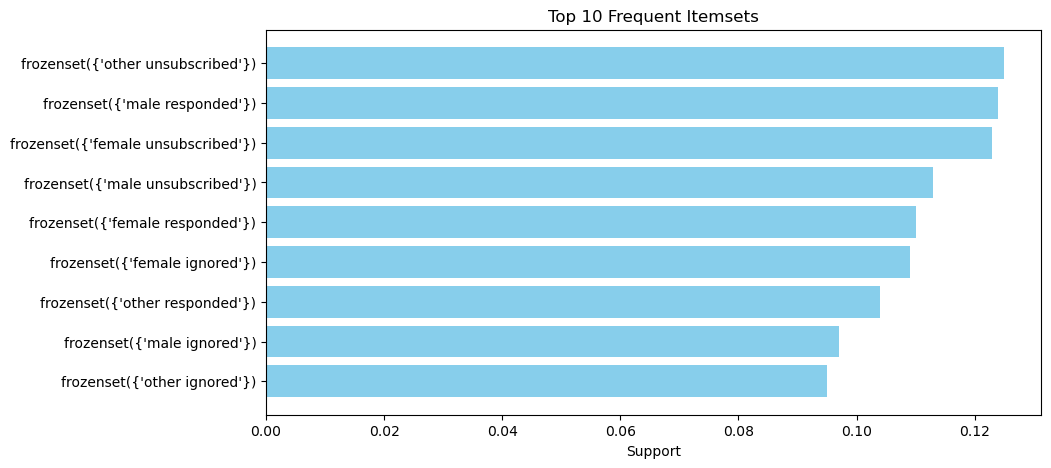

In [27]:
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(top_items['itemsets'].astype(str), top_items['support'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.show()

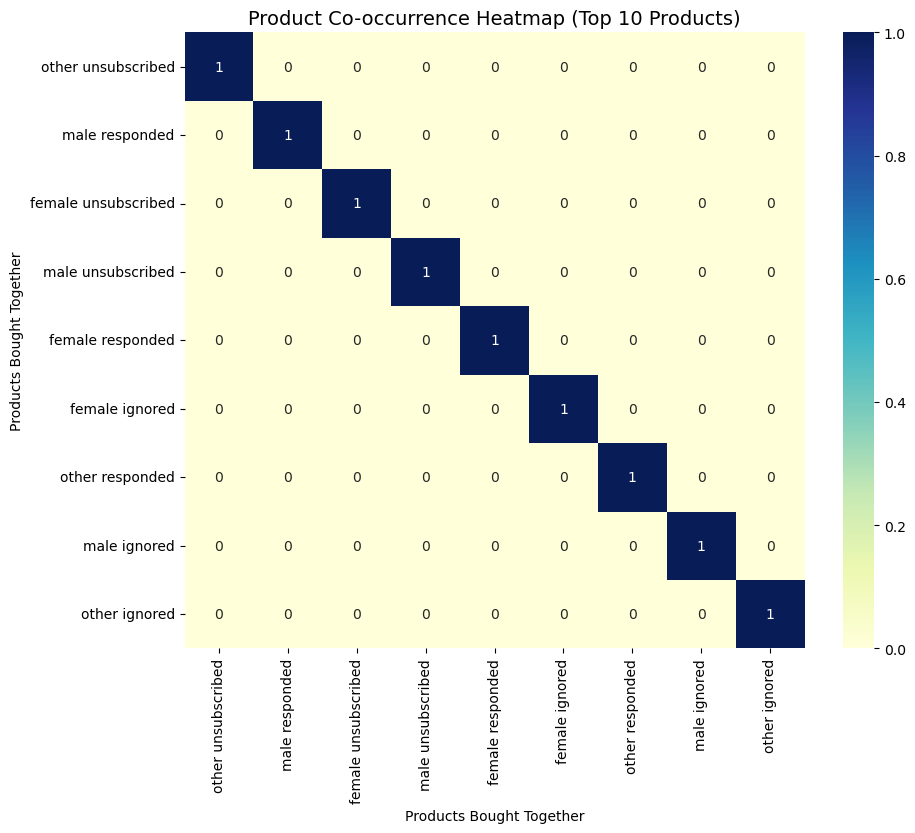

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
top_items = basket_sets.sum().sort_values(ascending=False).head(10).index
top_basket = basket_sets[top_items]
co_matrix = top_basket.T.dot(top_basket)
plt.figure(figsize=(10,8))
sns.heatmap(co_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Product Co-occurrence Heatmap (Top 10 Products)", fontsize=14)
plt.xlabel("Products Bought Together")
plt.ylabel("Products Bought Together")
plt.show()

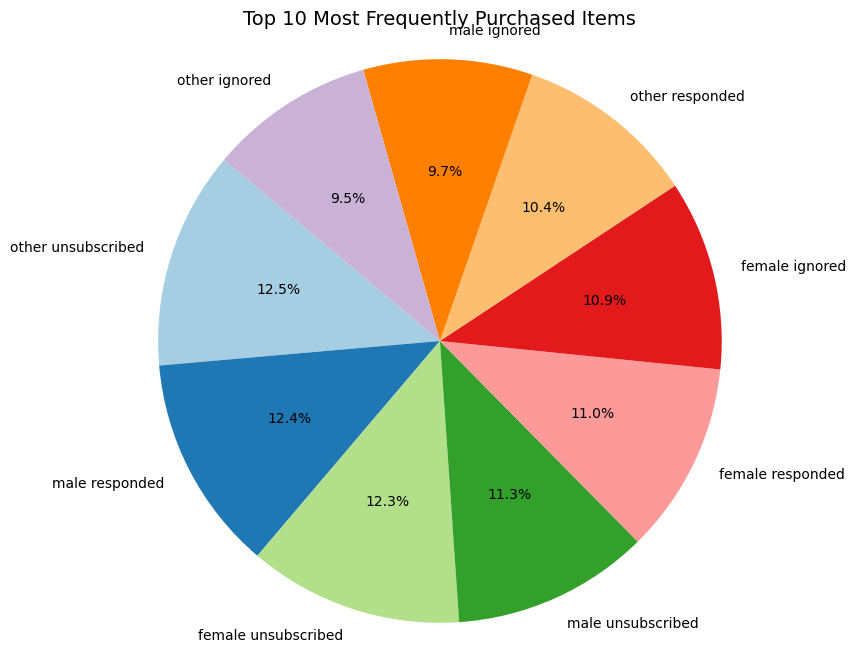

In [42]:
import matplotlib.pyplot as plt
top_items = basket_sets.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(top_items,
        labels=top_items.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors)
plt.title("Top 10 Most Frequently Purchased Items", fontsize=14)
plt.axis('equal')  
plt.show()